## NUS Prakikum 3

### Aufgabe 1
#### a)

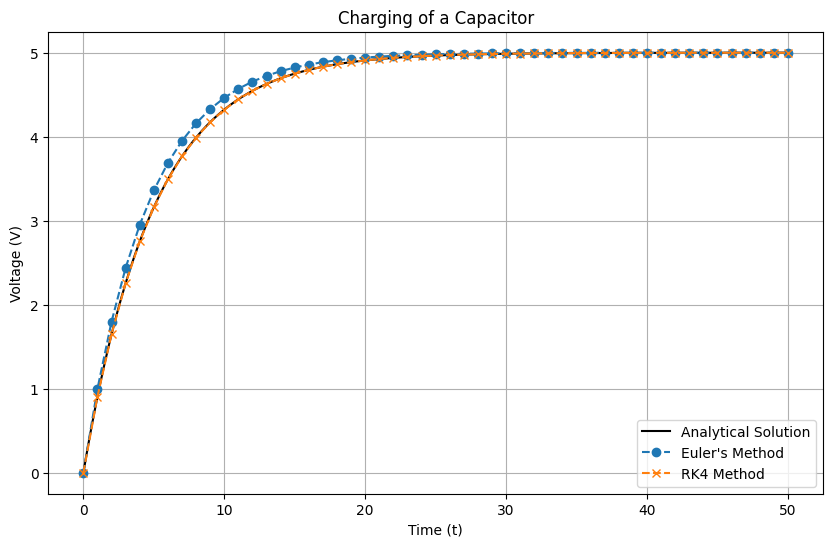

In [23]:
import numpy as np
import numkit
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
R = 10  # resistance in ohms
C = 0.5  # capacitance in farads
V_L = 5  # charging voltage in volts
tau = R * C  # time constant

# Differential equation term
def dV_dt(t, V):
    return (V_L - V) / (R * C)

# Analytical solution
def V_analytical(t):
    return V_L * (1 - np.exp(-t / tau))

# Initial condition
V0 = 0
# Time span and step size
t_span = (0,50)

h = 1

# Solve the differential equation using Euler's method
t_euler, V_euler = numkit.awp_euler(dV_dt,t_span, V0, h)

# Solve the differential equation using RK4 method
t_rk4, V_rk4 = numkit.awp_rk4(dV_dt,t_span, V0, h)

# Calculate the analytical solution
t_analytical = np.linspace(t_span[0], t_span[1], 500)
V_analytical_values = V_analytical(t_analytical)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_analytical, V_analytical_values, label='Analytical Solution', color='black')
plt.plot(t_euler, V_euler, label="Euler's Method", linestyle='--', marker='o')
plt.plot(t_rk4, V_rk4, label='RK4 Method', linestyle='--', marker='x')
plt.xlabel('Time (t)')
plt.ylabel('Voltage (V)')
plt.title('Charging of a Capacitor')
plt.legend()
plt.grid(True)
plt.show()


#### b)

In [24]:
# Calculate absolute deviations
abs_dev_euler = np.abs(V_analytical(t_euler) - V_euler)
abs_dev_rk4 = np.abs(V_analytical(t_rk4) - V_rk4)

# Find maximum deviations and corresponding times
max_dev_euler = np.max(abs_dev_euler)
max_dev_time_euler = t_euler[np.argmax(abs_dev_euler)]

max_dev_rk4 = np.max(abs_dev_rk4)
max_dev_time_rk4 = t_rk4[np.argmax(abs_dev_rk4)]

# Print the results
print(f"Max deviation (Euler's Method): {max_dev_euler:.4f} V at t = {max_dev_time_euler}")
print(f"Max deviation (RK4 Method): {max_dev_rk4:.4f} V at t = {max_dev_time_rk4}")


Max deviation (Euler's Method): 0.2010 V at t = 5.0
Max deviation (RK4 Method): 0.0000 V at t = 5.0


#### c)

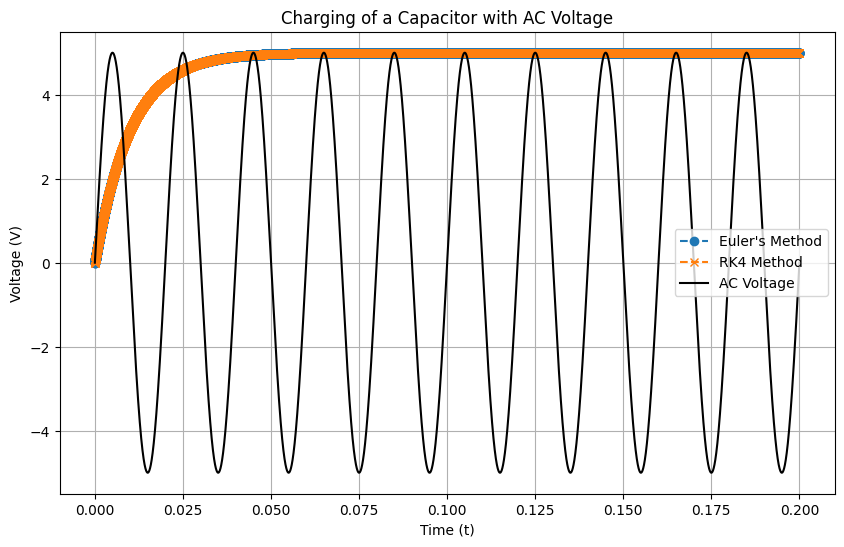

Steady-state amplitude: 5.0000 V
Phase shift: 20.0000 radians


In [25]:
# New parameters for AC voltage
R = 1  # resistance in ohms
C = 0.01  # capacitance in farads
V_A = 5  # amplitude of the AC voltage in volts
omega_L = 100 * np.pi  # angular frequency in rad/s

# Differential equation term with AC voltage
def dV_dt_ac(t, V):
    return (V_A * np.sin(omega_L * t) - V) / (R * C)

# Initial condition
V0 = 0
# Time span and step size
t_span = (0, 0.2)
h = 5e-6

# Solve the differential equation using Euler's method
t_euler_ac, V_euler_ac = numkit.awp_euler(dV_dt,t_span, V0, h)

# Solve the differential equation using RK4 method
t_rk4_ac, V_rk4_ac = numkit.awp_rk4(dV_dt,t_span, V0, h)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_euler_ac, V_euler_ac, label="Euler's Method", linestyle='--', marker='o')
plt.plot(t_rk4_ac, V_rk4_ac, label='RK4 Method', linestyle='--', marker='x')
plt.plot(t_euler_ac, V_A * np.sin(omega_L * t_euler_ac), label='AC Voltage', color='black')
plt.xlabel('Time (t)')
plt.ylabel('Voltage (V)')
plt.title('Charging of a Capacitor with AC Voltage')
plt.legend()
plt.grid(True)
plt.show()

# Calculate phase shift and steady-state amplitude  
steady_state_amplitude = np.max(V_rk4_ac)
phase_shift = np.argmax(V_rk4_ac) * h * omega_L / np.pi  # phase shift in radians

print(f"Steady-state amplitude: {steady_state_amplitude:.4f} V")
print(f"Phase shift: {phase_shift:.4f} radians")
